In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_path_to_moon_experiment_storage, get_test_moon_path
from geobin import EstimateQuantities1Run, AveragedEstimates

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


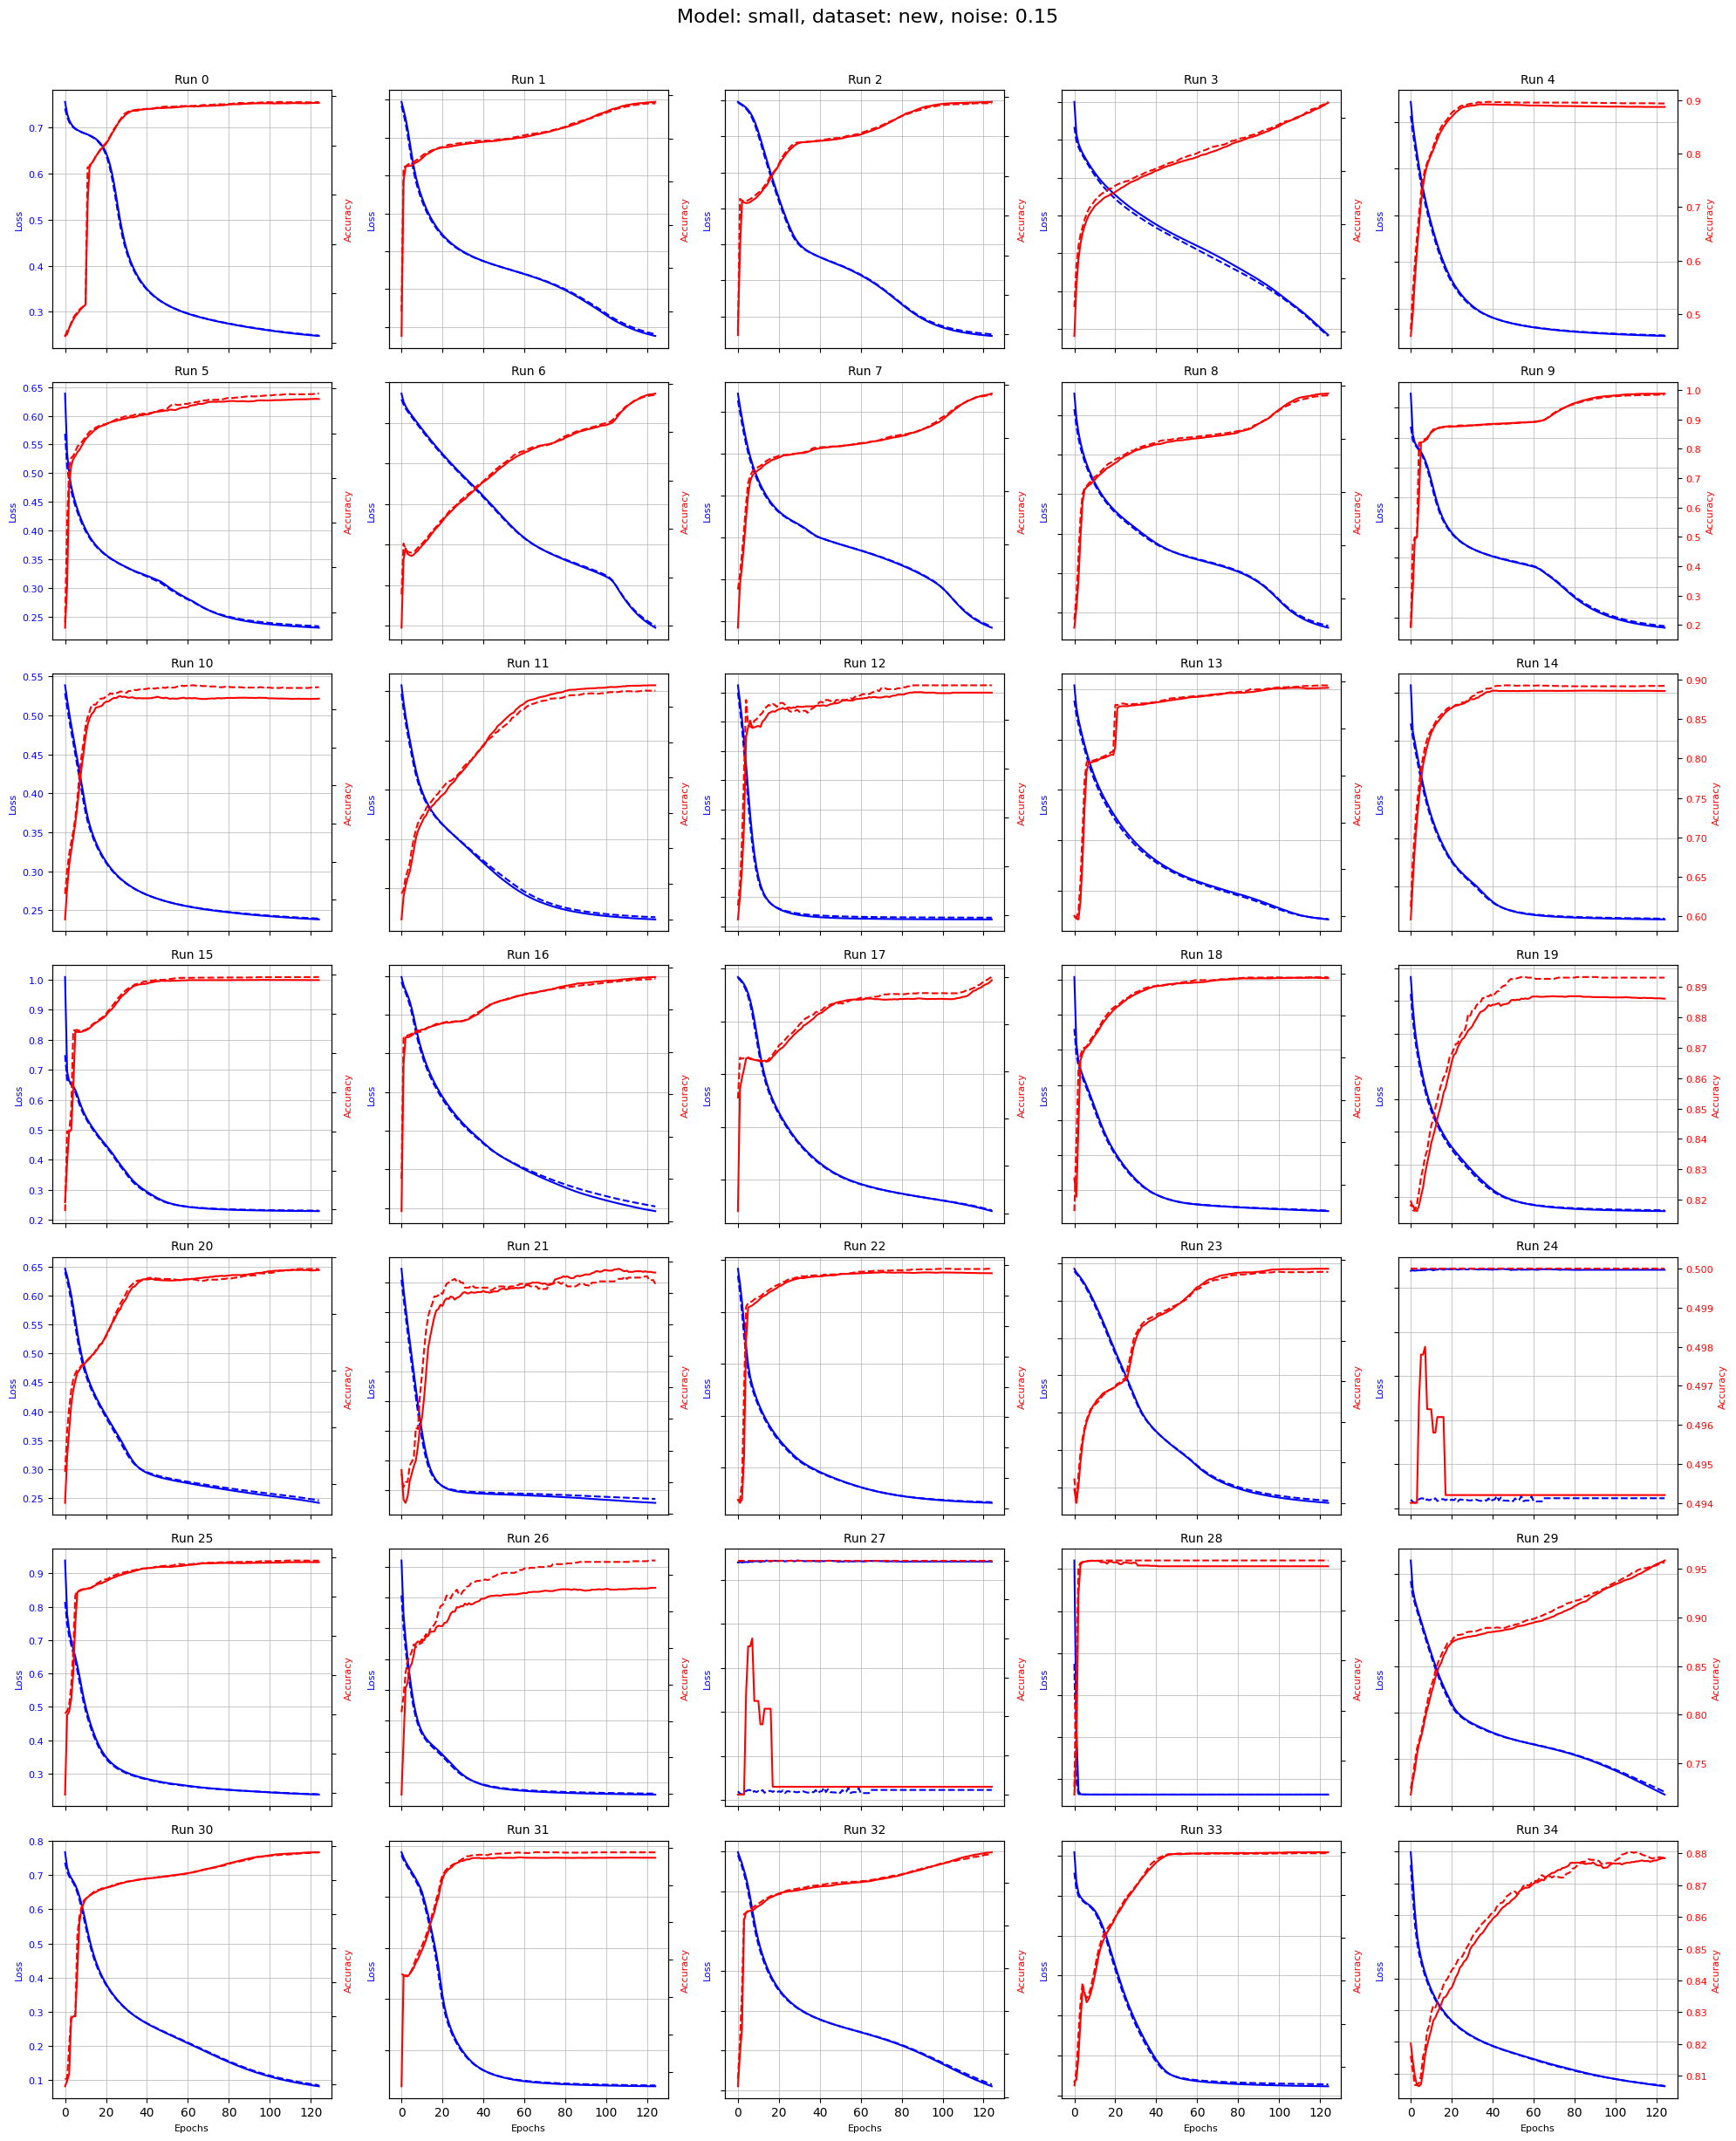

In [3]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.15)

In [4]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [5]:
first_run = EstimateQuantities1Run(model_name="small", dataset_name="new", noise_level=0.15, run_number=0)

In [6]:
MI = first_run.estimates["MI_KL"]
MI

[]

In [7]:
first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [8]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


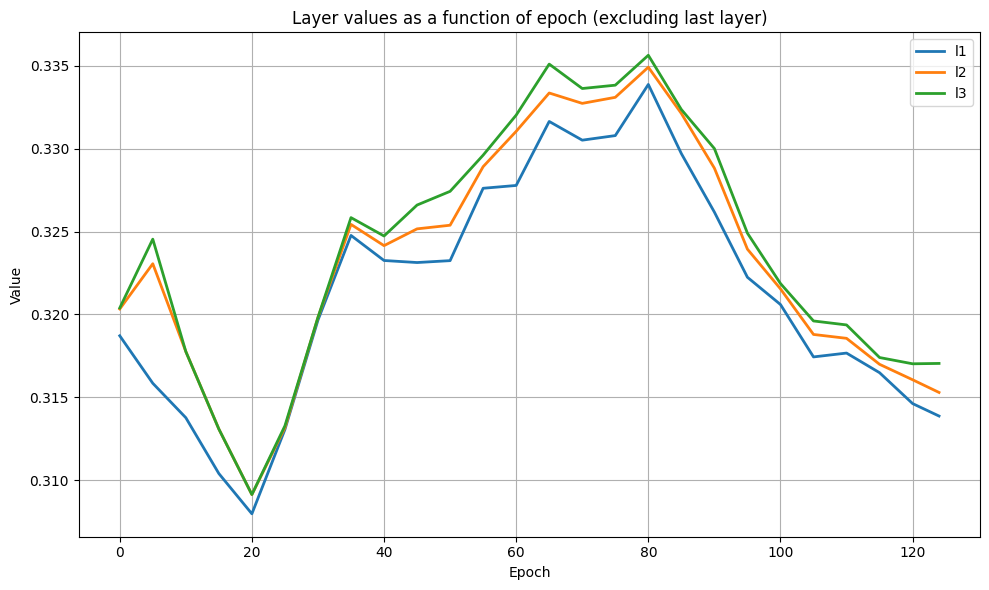

In [9]:
plot_layers_exclude_last(MI)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            model_name=model_name,
            dataset_name=dataset_name,
            noise_level=noise_level,
            run_number=int(run_number)
        )
        run.calculate_estimates()
        df = run.estimates["MI_IS"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


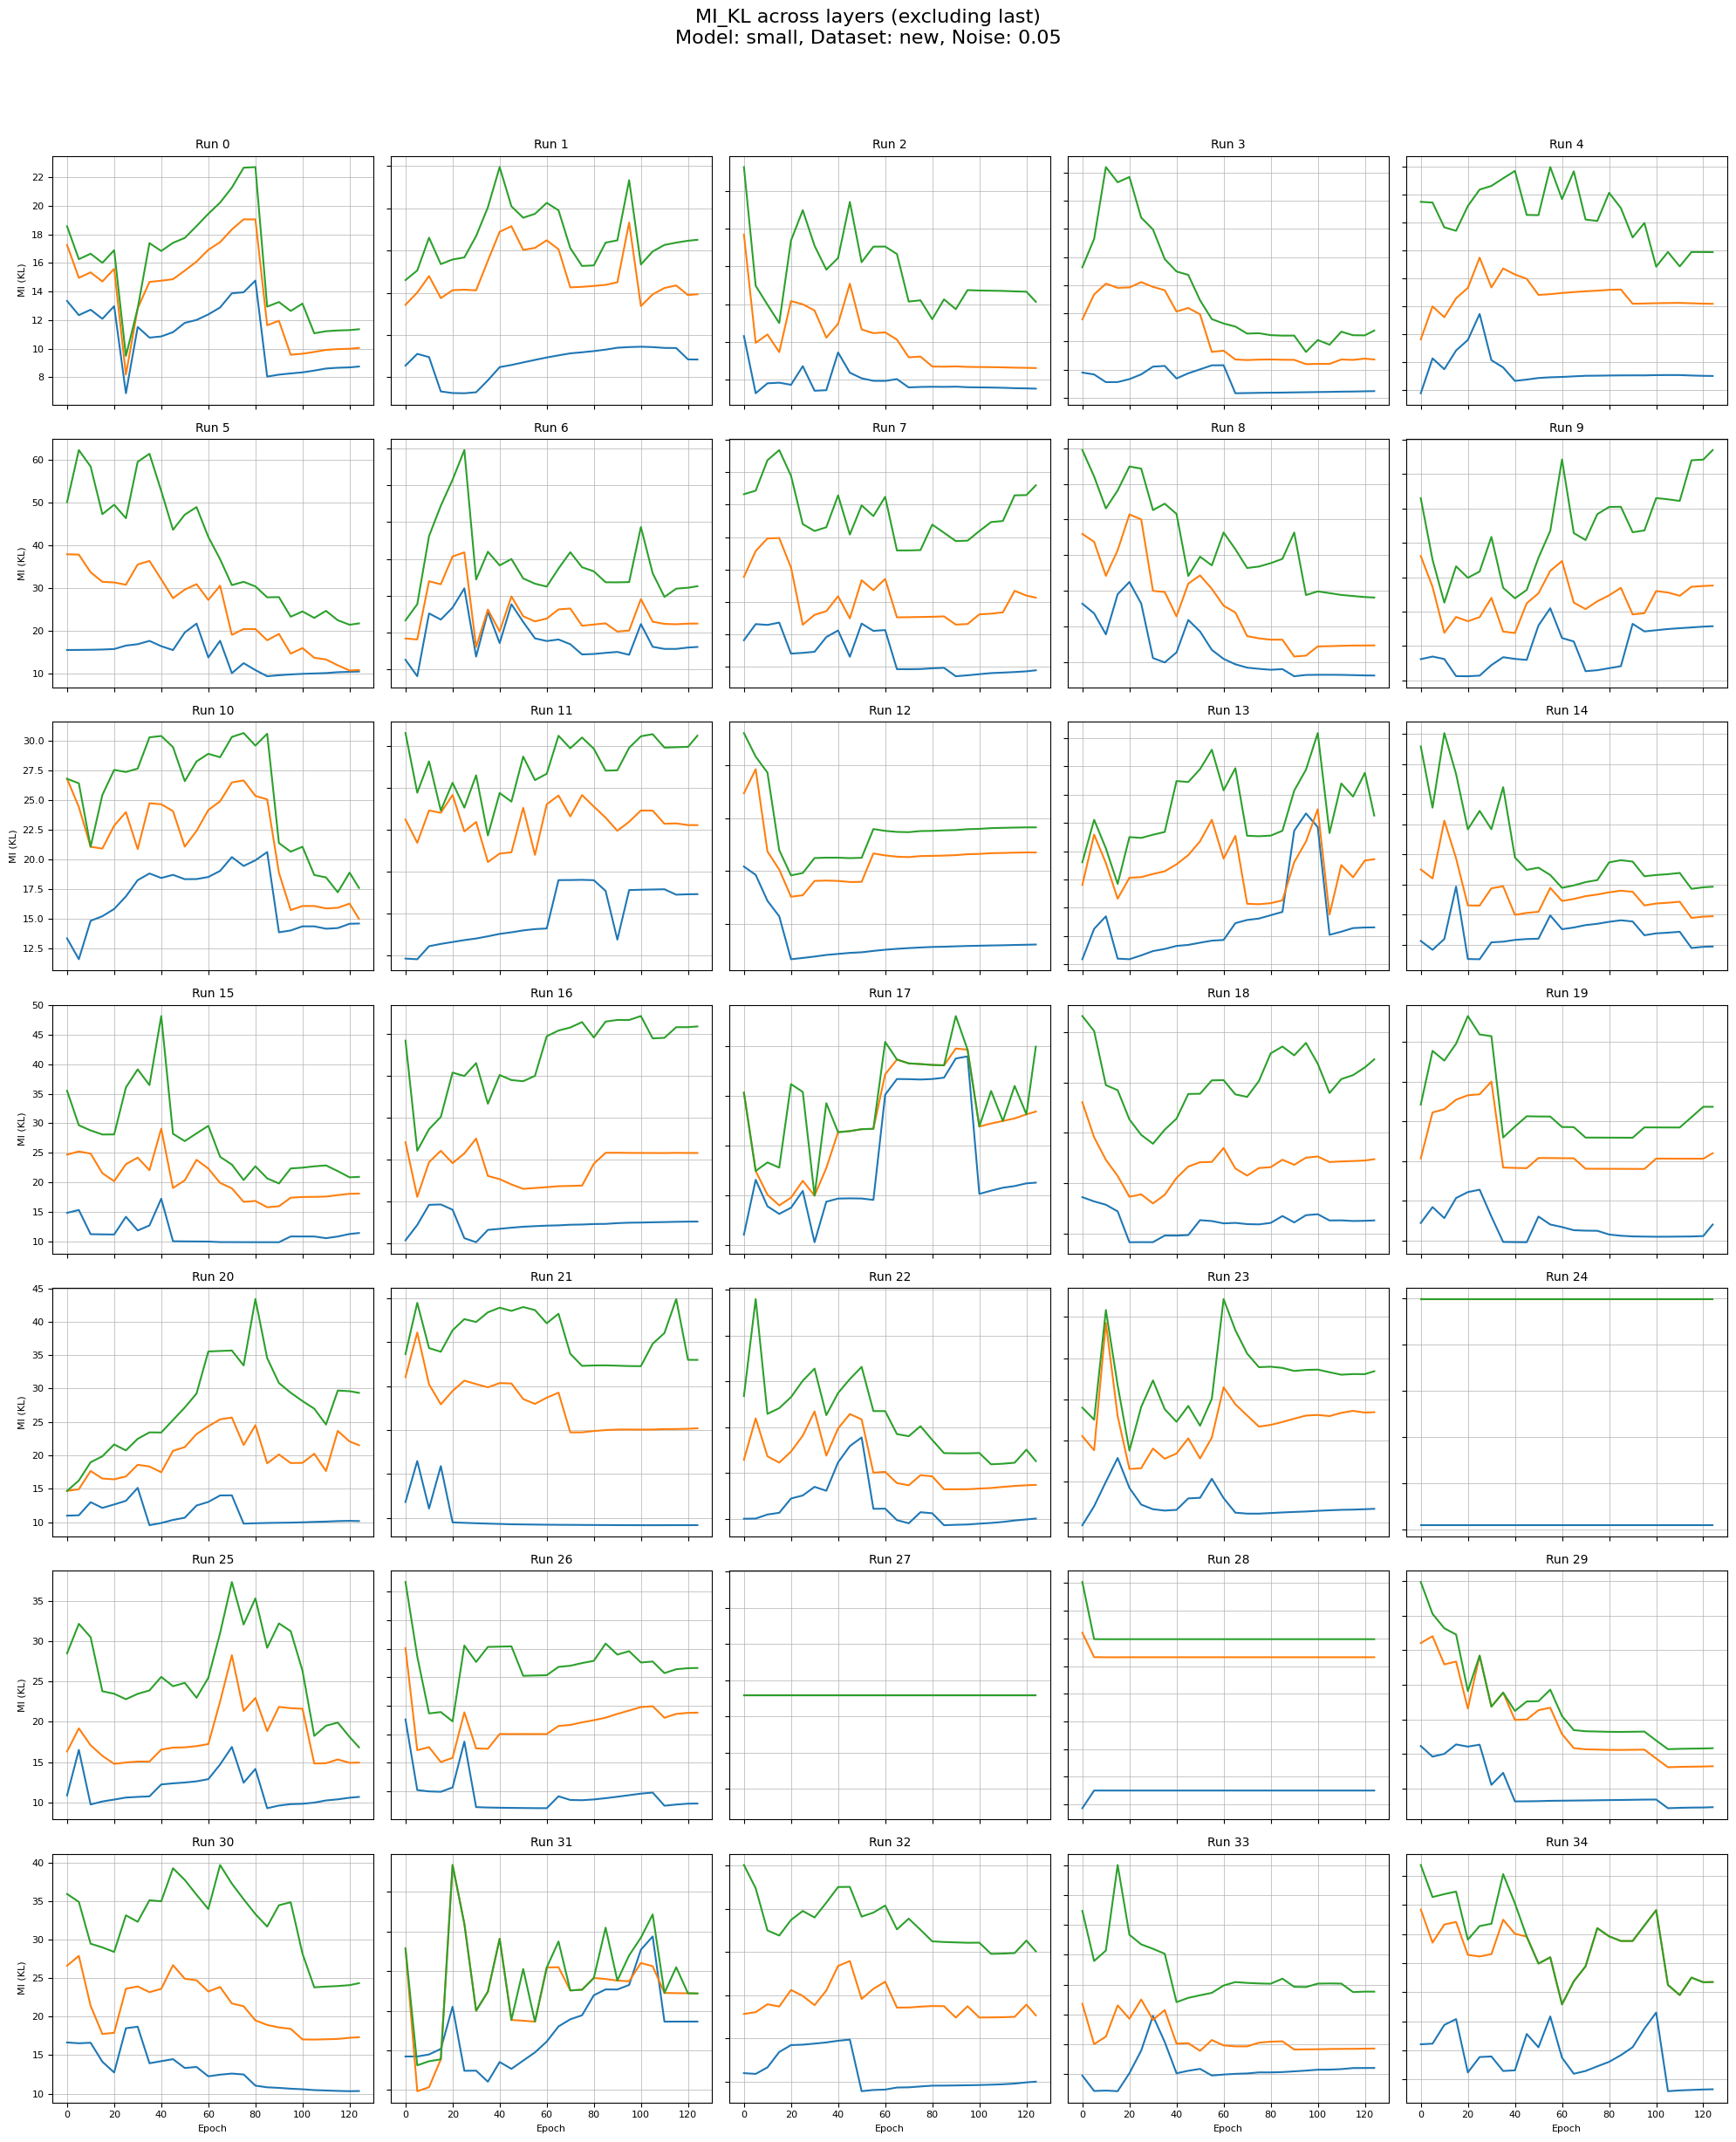

In [22]:
plot_multiple_runs_MI_layers_grid(
    model_name="small",
    dataset_name="new",
    noise_level=0.05,
    run_numbers=np.arange(35)
)

In [ ]:
avg1 = AveragedEstimates(noise_level=0.05)
avg1._find_from_all_runs()

In [24]:
dfs = avg1.individual_estimates["MI_IS"]

In [25]:
all_runs = (
    pd.concat(dfs, keys=range(35), names=["run", "row"])
      .reset_index(level="run")
)


In [26]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,0,0,15.473931,24.391774,30.623907,36.068730
1,0,5,17.641099,31.249582,39.464887,46.532097
2,0,10,16.790196,29.233477,37.264211,46.723565
3,0,15,15.295113,25.767130,34.050879,41.709024
4,0,20,15.141013,25.476284,42.066391,46.776652
...,...,...,...,...,...,...
21,34,105,17.911961,34.027379,37.337366,41.679815
22,34,110,16.472357,32.119785,33.407969,37.746571
23,34,115,16.645575,29.417407,30.712352,35.034080


In [27]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [28]:
summary

l1                   l2                   l3             \
            mean       std       mean       std       mean        std   
epoch                                                                   
0      15.679301  1.310267  30.408550  6.140549  44.983433  13.700444   
5      16.447755  1.310021  32.723721  6.531551  48.934081  15.895827   
10     16.222464  1.529024  32.003118  6.775679  47.666001  15.451080   
15     16.407138  1.588410  32.563022  6.651197  47.880426  14.651059   
20     16.589543  1.722807  32.725845  6.745139  47.366636  14.874591   
25     16.680509  1.767193  32.888290  6.441727  47.305703  14.012873   
30     16.815338  1.839212  33.040737  7.052135  47.015128  14.340370   
35     16.586585  1.929262  33.054820  7.166617  46.674972  14.233739   
40     16.655930  1.850423  32.560361  7.402486  46.197087  14.353192   
45     16.536200  1.821612  32.265903  7.440958  45.443478  13.950321   
50     16.408824  1.732841  32.577994  7.566119  45.969050  14.276348   
55     16.562342  1.987861  32.460712  7.140134  45.690067  13.537743   
60     16.865581  2.041887  32.658266  7.201860  45.927017  13.785080   
65     16.740608  1.998628  32.547665  7.727136  45.962378  15.276448   
70     16.828639  2.058808  32.647170  7.767668  46.125223  15.487796   
75     16.822998  2.193099  32.660838  7.673736  45.796216  15.512401   
80     16.944359  2.233456  32.941366  8.107644  46.225114  16.258713   
85     17.075544  2.141423  33.329700  8.295219  46.375391  16.849943   
90     17.056142  2.159580  33.144952  8.441490  46.054359  17.228297   
95     17.091431  2.175994  33.238800  8.245878  45.943565  16.646340   
100    17.138413  2.203933  33.257693  8.706162  46.349018  17.860829   
105    17.105920  2.125802  32.552194  8.499416  45.990622  18.216850   
110    17.167924  2.125355  32.683078  8.797010  46.101509  19.049516   
115    17.002416  2.168325  32.795836  9.142624  45.815193  18.136160   
120    17.044072  2.080619  33.083383  9.169264  45.983828  17.598520   
124    17.011965  2.130499  32.751100  9.169797  45.634184  17.337519   

              l4             
            mean        std  
epoch                        
0      54.554014  17.459177  
5      57.569925  19.363245  
10     55.779872  18.209616  
15     55.473177  16.944145  
20     54.184545  16.733725  
25     54.740318  15.981994  
30     54.222996  16.238142  
35     53.680847  15.832423  
40     53.260626  15.902863  
45     52.525722  15.838854  
50     52.970395  15.852303  
55     53.473066  15.912860  
60     53.361137  15.919068  
65     53.360026  17.119277  
70     53.300496  17.011752  
75     52.908515  17.173743  
80     53.374071  17.790870  
85     53.830991  18.697247  
90     53.291716  18.974951  
95     53.123040  18.596351  
100    53.520441  19.911517  
105    53.174702  20.178369  
110    53.287072  20.991375  
115    52.991861  20.178369  
120    53.160800  19.546534  
124    53.007402  19.481001

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


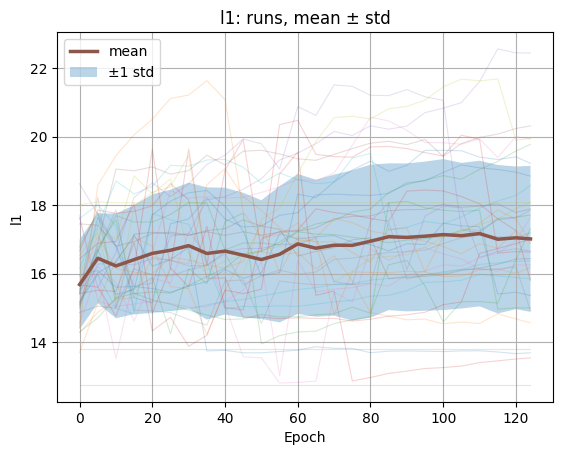

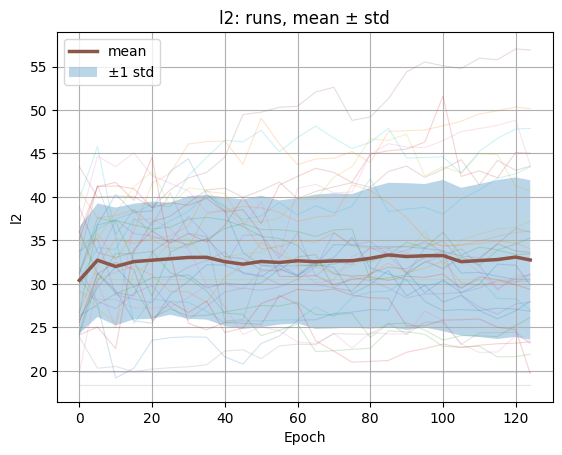

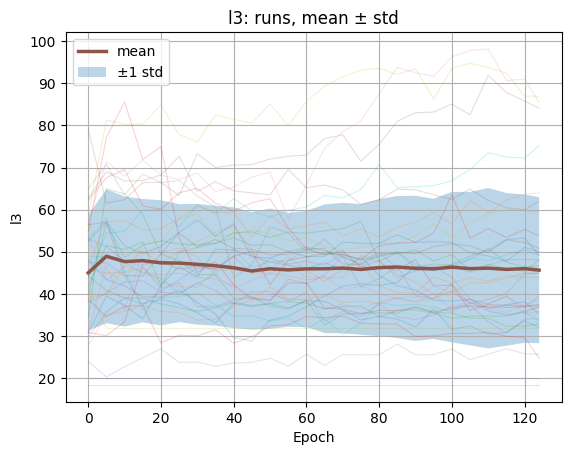

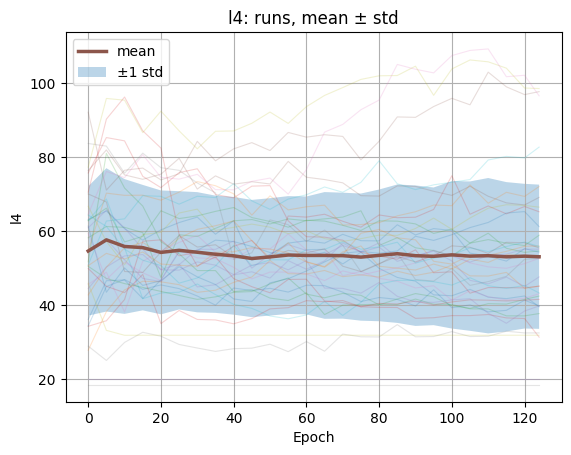

In [30]:
plot_runs_with_mean_std(dfs)

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_layer_means_same_figure(
    dfs,
    layers=None,
    lw_mean=2.5,
    alpha_std=0.25,
    show_std=True,
    logy=True
):
    """
    Plot mean (and optionally ± std) across runs for all layers
    in a single figure, with optional log-scale y-axis.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    lw_mean : float
        Line width of mean curves.
    alpha_std : float
        Transparency of std shading.
    show_std : bool
        Whether to show ±1 std shading.
    logy : bool
        Whether to use logarithmic y-axis.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    fig, ax = plt.subplots(figsize=(10, 6))

    for layer in layers:
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        # Mean curve
        ax.plot(
            stats["epoch"],
            stats["mean"],
            lw=lw_mean,
            label=layer
        )

        # Std shading
        if show_std:
            ax.fill_between(
                stats["epoch"],
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=alpha_std
            )

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.set_title("Layer-wise mean (± std) across runs")

    if logy:
        ax.set_yscale("log")

    ax.legend(title="Layer")
    ax.grid(True, which="both", lw=0.5)
    plt.tight_layout()
    plt.show()


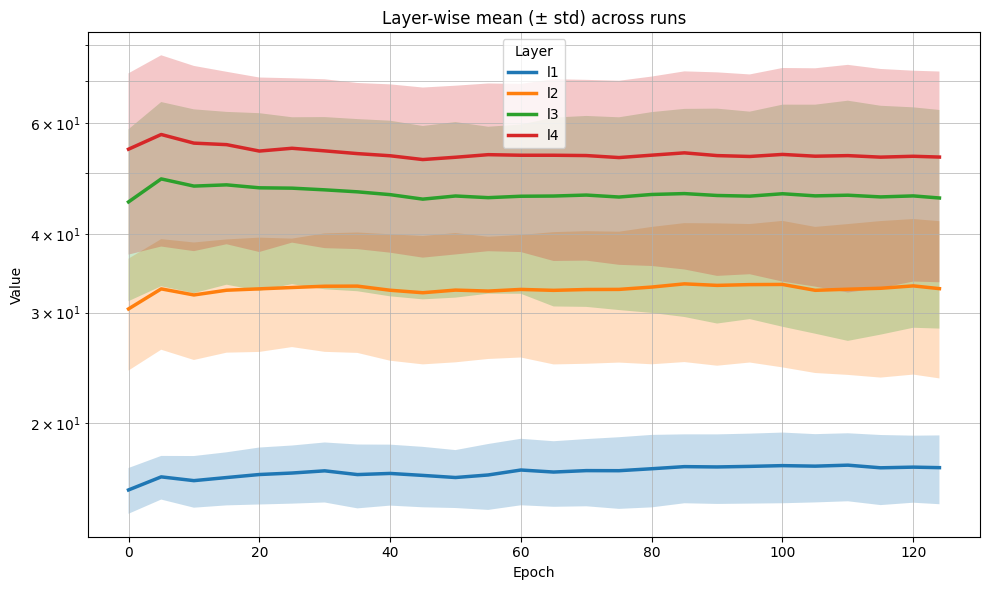

In [32]:
plot_layer_means_same_figure(
    dfs=dfs,          # list of MI_KL DataFrames
    show_std=True
)
